In [11]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)  # Set to None to display all columns

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime


In [12]:
df = pd.read_csv('..\\DAta\\updated_dataset.csv',parse_dates=['Order_Time'])

In [ ]:
# Load the dataset
data = pd.read_csv('../Data/updated_dataset.csv')
data['Order_Time'] = pd.to_datetime(data['Order_Time'])
data.set_index('Order_Time', inplace=True)
data.sort_index(inplace=True)
data.head()

In [13]:
df.head()

,Customer_ID,Gender,Age,City,Product_Category,Product_ID,Price,Quantity,Order_Time,Delivery_Time_mins,Payment_Method,Discount_Applied,Loyalty_Points_Earned,Cart_Abandonment_Flag,Total_Purchase_Value,Lifetime_Value,Competitor_Price,Ad_Click_Through_Rate,Browsing_Time_mins,Voice_Search_Count,Visual_Search_Count,Age_Group,Loyalty_Tier,Discount_Percentage,High_Spender_Flag
0,ZP_CUST4000,Female,51,Bangalore,Snacks,ZP_PROD6365,424.68,4,2023-01-29,11,Debit Card,20.87,198,1,1698.72,1698.72,407.778175,0.228576,84,11,7,41-60,Silver,4.914288,1
1,ZP_CUST4001,Non-Binary,37,Delhi,Groceries,ZP_PROD7167,492.82,2,2023-10-06,8,Debit Card,9.82,169,0,985.64,985.64,507.168695,0.677495,17,0,7,26-40,Silver,1.992614,1
2,ZP_CUST4002,Female,31,Chennai,Household Items,ZP_PROD7103,319.89,2,2023-03-01,14,Net Banking,25.13,64,1,639.78,639.78,360.362708,0.305420,182,3,0,26-40,Bronze,7.855825,0
3,ZP_CUST4003,Male,52,Mumbai,Snacks,ZP_PROD3534,183.63,1,2023-11-09,13,Net Banking,8.40,40,1,183.63,183.63,160.853115,0.577577,164,3,11,41-60,Bronze,4.574416,0
4,ZP_CUST4004,Male,38,Chennai,Household Items,ZP_PROD5514,408.78,4,2023-04-27,13,Debit Card,28.38,43,1,1635.12,1635.12,375.764482,0.295836,63,5,3,26-40,Bronze,6.942610,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Customer_ID            2000 non-null   object        
 1   Gender                 2000 non-null   object        
 2   Age                    2000 non-null   int64         
 3   City                   2000 non-null   object        
 4   Product_Category       2000 non-null   object        
 5   Product_ID             2000 non-null   object        
 6   Price                  2000 non-null   float64       
 7   Quantity               2000 non-null   int64         
 8   Order_Time             2000 non-null   datetime64[ns]
 9   Delivery_Time_mins     2000 non-null   int64         
 10  Payment_Method         2000 non-null   object        
 11  Discount_Applied       2000 non-null   float64       
 12  Loyalty_Points_Earned  2000 non-null   int64         
 13  Car

In [44]:
# Historical purchase data analysis
# Group by month and calculate the total purchase value for each month
monthly_data = data.resample('ME').sum()

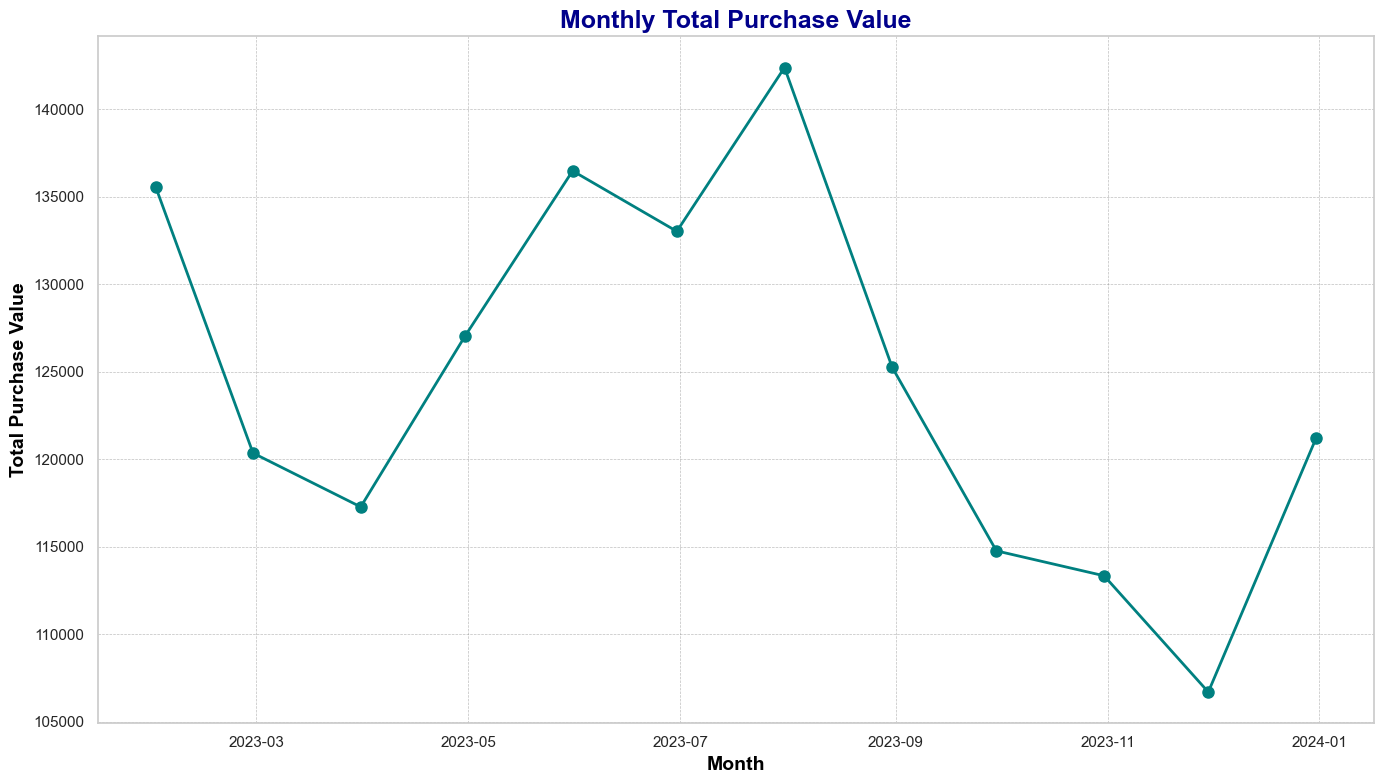

In [119]:
# Create the figure with a clean, modern style
plt.figure(figsize=(14, 8))

# Plot the monthly total purchase value with customized line and markers
plt.plot(monthly_data.index, monthly_data['Total_Purchase_Value'], marker='o', linestyle='-', 
         color='teal', markersize=8, linewidth=2)

# Add a title with modern and bold styling
plt.title('Monthly Total Purchase Value', fontsize=18, fontweight="bold", color="darkblue")

# Customize the axis labels with larger, bold font
plt.xlabel('Month', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Total Purchase Value', fontsize=14, fontweight='bold', color='black')

# Add grid lines with a lighter style to make it cleaner
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.5)

# Adjust layout to ensure proper spacing
plt.tight_layout()

# Show the plot
plt.show()


In [46]:
# Calculate year-over-year growth
monthly_data['Year'] = monthly_data.index.year
monthly_data['Month'] = monthly_data.index.month
yearly_growth = monthly_data.pivot_table(values='Total_Purchase_Value', index='Month', columns='Year', aggfunc='sum')
yearly_growth_pct = yearly_growth.pct_change(axis='columns') * 100

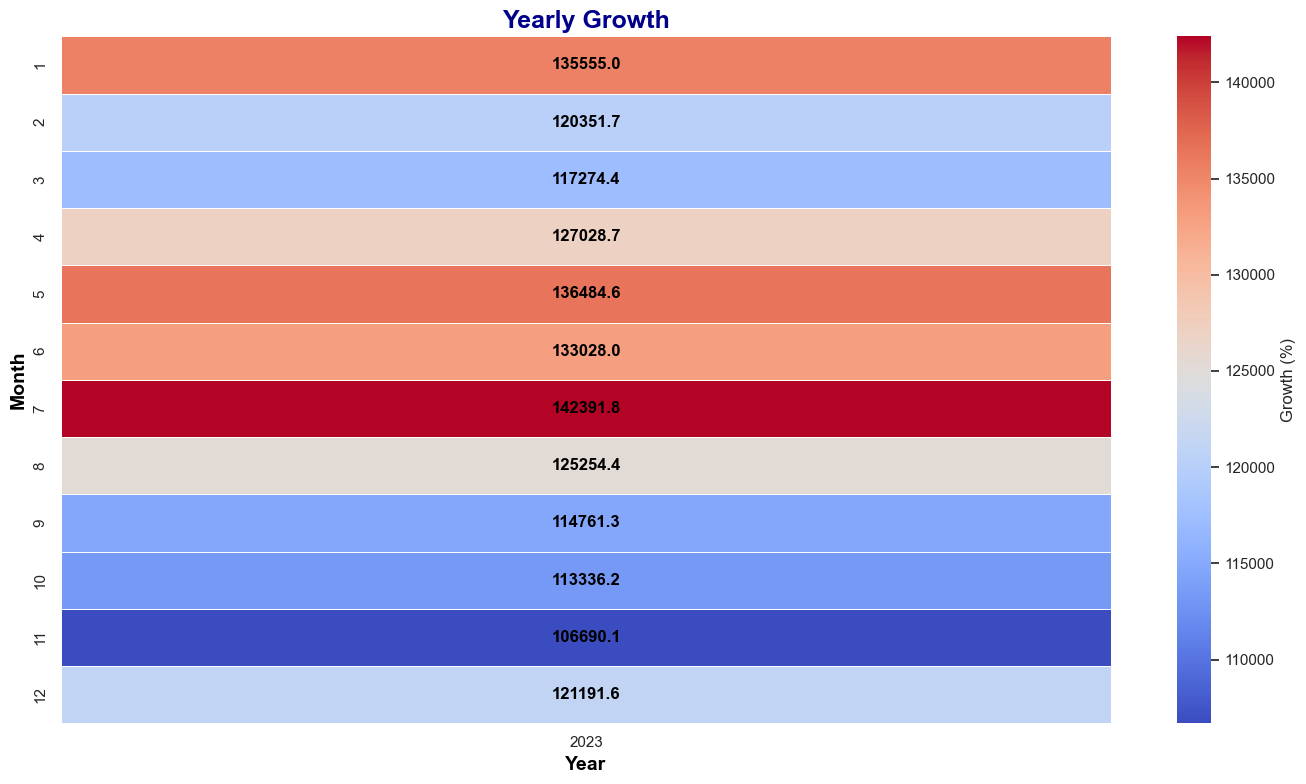

In [117]:
# Set a modern, clean style for the plot
sns.set_theme(style="whitegrid", palette="Set2")

# Create the figure
plt.figure(figsize=(14, 8))

# Check if 'yearly_growth_pct' contains only NaN values and choose the appropriate data for the heatmap
if yearly_growth_pct.isna().all().all():
    heatmap_data = yearly_growth
    title = 'Yearly Growth'
else:
    heatmap_data = yearly_growth_pct
    title = 'Year-over-Year Growth (%)'

# Plot the heatmap with custom style
ax = sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="coolwarm", annot_kws={"size": 12, 'weight': 'bold', 'color': 'black'},
                 cbar_kws={'label': 'Growth (%)'}, linewidths=0.5, linecolor='white')

# Customize the title with bold and modern styling
plt.title(title, fontsize=18, fontweight="bold", color="darkblue")

# Customize axis labels with larger, bold font
plt.xlabel('Year', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Month', fontsize=14, fontweight='bold', color='black')

# Display the plot with improved grid lines
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.5)

# Adjust layout for cleaner spacing
plt.tight_layout()

# Show the plot
plt.show()

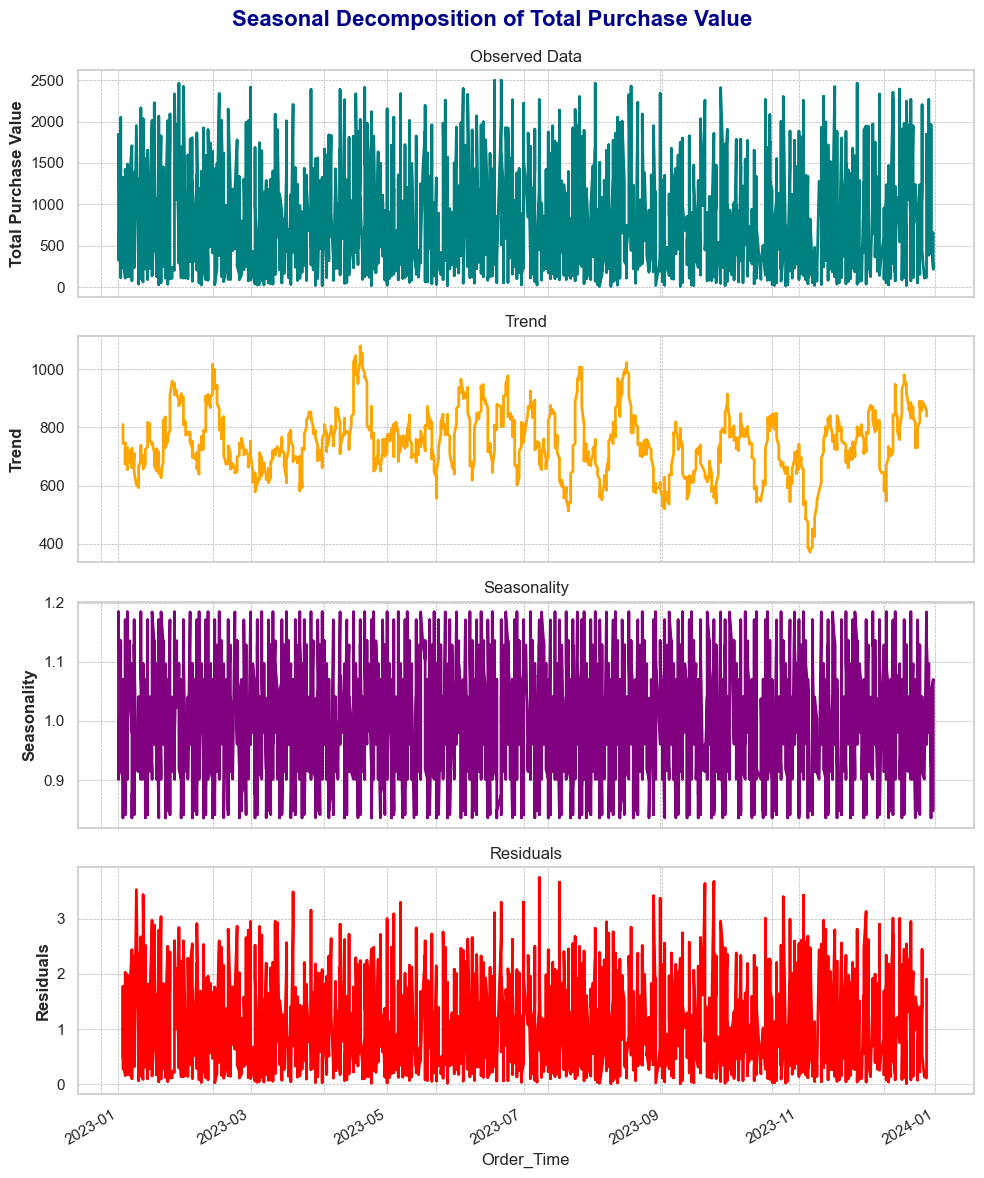

In [115]:
result = seasonal_decompose(data['Total_Purchase_Value'], model='multiplicative', period=30)

# Create the plot with customized colors
fig, axes = plt.subplots(4, 1, figsize=(10, 12), sharex=True)

# Plot each component with custom styling
result.observed.plot(ax=axes[0], color='teal', title='Observed Data', linewidth=2)
result.trend.plot(ax=axes[1], color='orange', title='Trend', linewidth=2)
result.seasonal.plot(ax=axes[2], color='purple', title='Seasonality', linewidth=2)
result.resid.plot(ax=axes[3], color='red', title='Residuals', linewidth=2)

# Add titles and axis labels with bold font
axes[0].set_ylabel('Total Purchase Value', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Trend', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Seasonality', fontsize=12, fontweight='bold')
axes[3].set_ylabel('Residuals', fontsize=12, fontweight='bold')

# Customizing the main title of the plot
fig.suptitle('Seasonal Decomposition of Total Purchase Value', fontsize=16, fontweight='bold', color='darkblue')

# Adjust grid and layout for better spacing
for ax in axes:
    ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.6)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.subplots_adjust(top=0.93)  # Adjust title spacing

# Show the plot
plt.show()

C:\Users\lokes\AppData\Local\Temp\ipykernel_11896\1450787892.py:29: UserWarning:

Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) Arial.

d:\Zepto_Case_study\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) Arial.



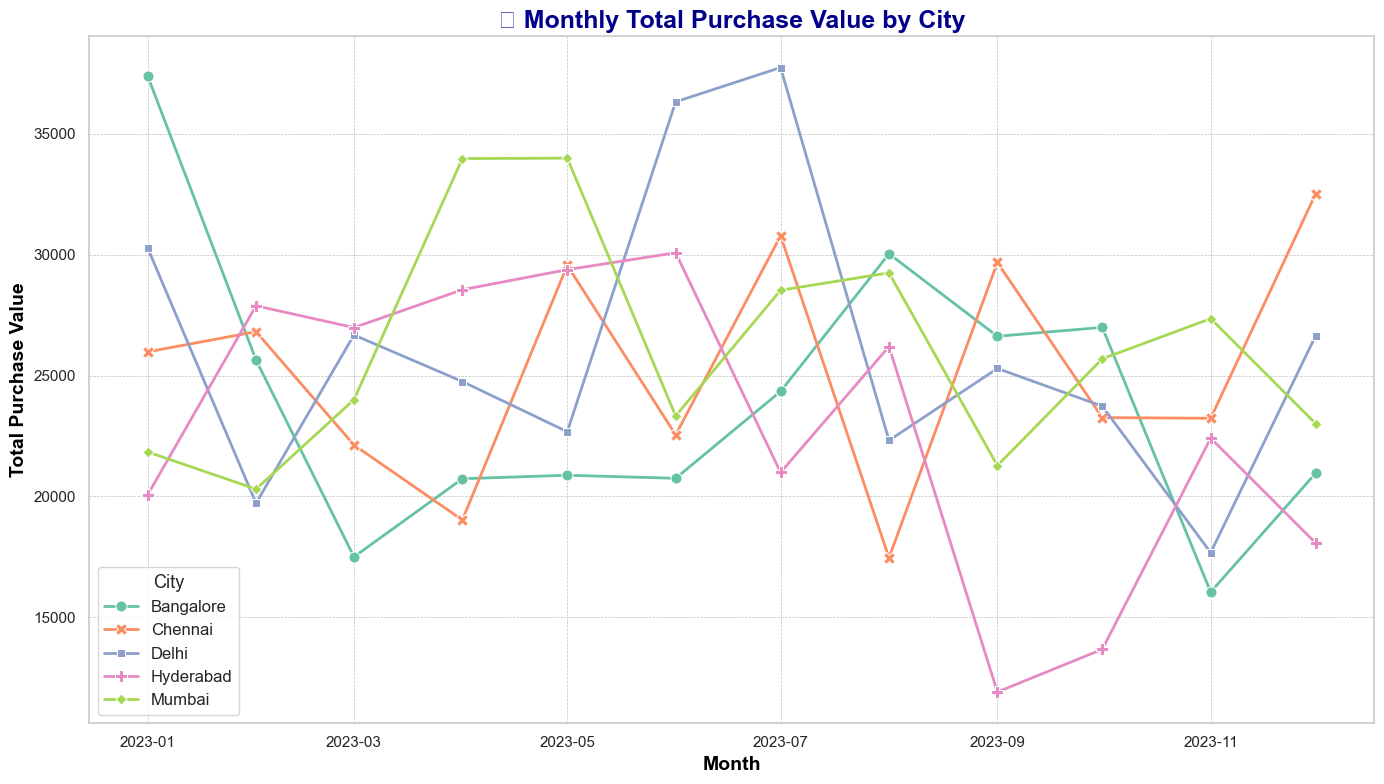

In [113]:
# Historical purchase data analysis
# Group by month and city, and calculate the total purchase value for each group
monthly_city_data = data.groupby([data.index.to_period('M'), 'City']).sum().reset_index()
monthly_city_data['Order_Time'] = monthly_city_data['Order_Time'].dt.to_timestamp()

sns.set_theme(style="whitegrid", palette="Set2")

# Create the plot
plt.figure(figsize=(14, 8))

# Use lineplot to plot total purchase values by city, with markers and customized line style
sns.lineplot(data=monthly_city_data, x='Order_Time', y='Total_Purchase_Value', hue='City', 
             marker='o', linewidth=2, markersize=8, dashes=False, style='City', markers=True)

# Add title with modern bold font
plt.title('💡 Monthly Total Purchase Value by City', fontsize=18, fontweight="bold", color="darkblue")

# Customize axis labels with bold and larger fonts
plt.xlabel('Month', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Total Purchase Value', fontsize=14, fontweight='bold', color='black')

# Display the legend with better placement
plt.legend(title="City", title_fontsize='13', fontsize='12', loc='lower left')

# Customize grid: lighten it up to not overpower the lines
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.5)

# Show the plot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

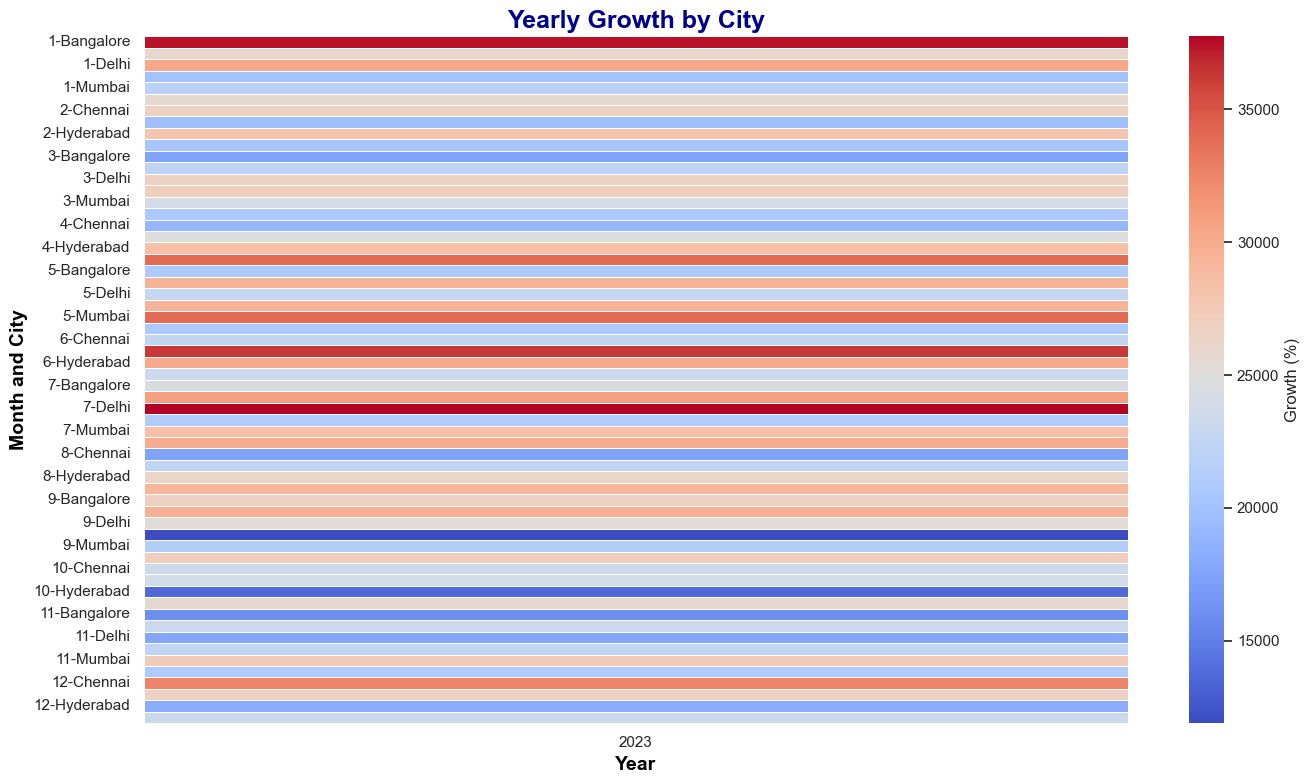

In [110]:
# Calculate year-over-year growth for each city
monthly_city_data['Year'] = monthly_city_data['Order_Time'].dt.year
monthly_city_data['Month'] = monthly_city_data['Order_Time'].dt.month
yearly_city_growth = monthly_city_data.pivot_table(values='Total_Purchase_Value', index=['Month', 'City'], columns='Year', aggfunc='sum')
yearly_city_growth_pct = yearly_city_growth.pct_change(axis='columns') * 100

sns.set_theme(style="whitegrid", palette="muted")

# Create the plot
plt.figure(figsize=(14, 8))

# Choose the correct data to plot based on the presence of NaN values
if yearly_city_growth_pct.isna().all().all():
    heatmap_data = yearly_city_growth
    title = 'Yearly Growth by City'
else:
    heatmap_data = yearly_city_growth_pct
    title = 'Year-over-Year Growth (%) by City'

# Create the heatmap
ax = sns.heatmap(heatmap_data, cmap="coolwarm", annot=False, cbar_kws={'label': 'Growth (%)'},
                 linewidths=0.5, linecolor='white')

# Set title and labels with modern styling
plt.title(title, fontsize=18, fontweight="bold", color="darkblue")
plt.xlabel('Year', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Month and City', fontsize=14, fontweight='bold', color='black')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

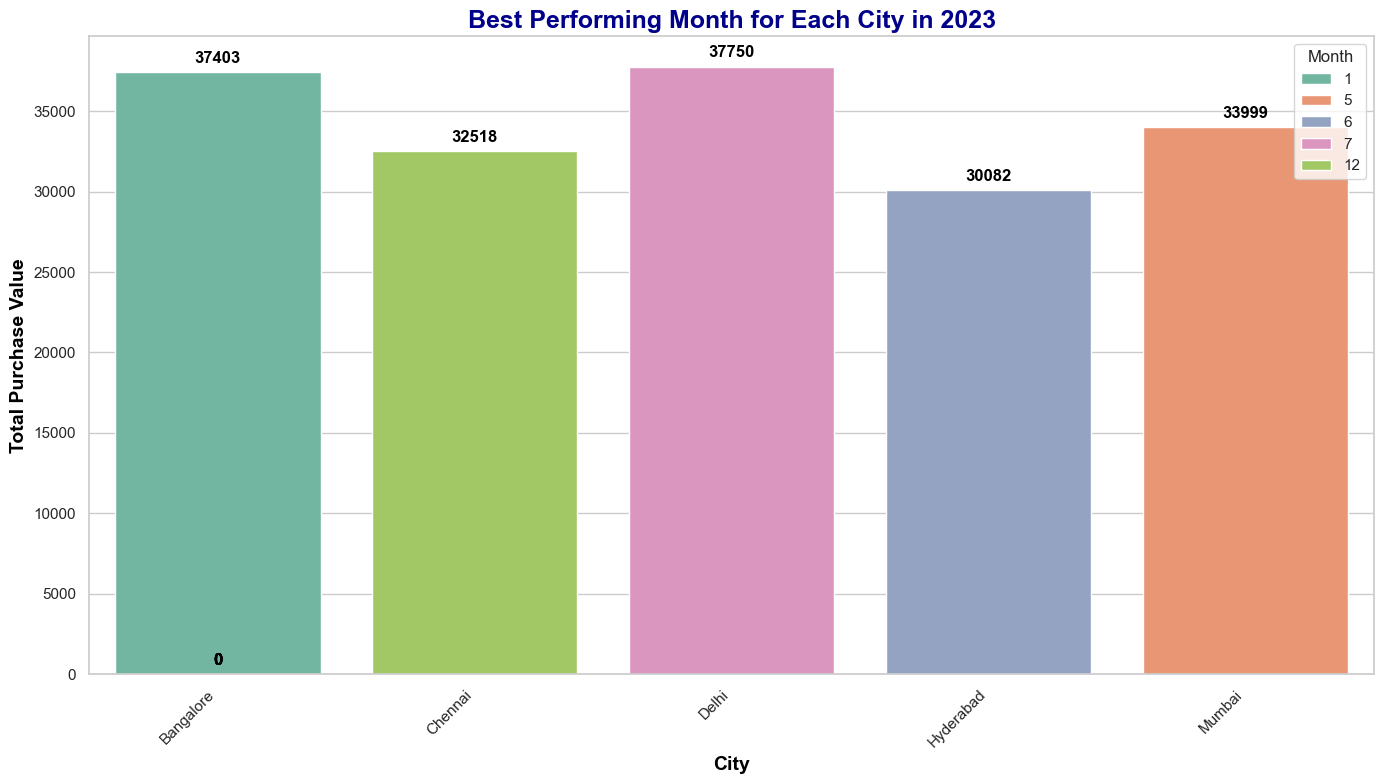

In [111]:

# Find the month where each city is performing Best
Best_months = yearly_city_growth.groupby('City').idxmax()
Best_performance = yearly_city_growth.loc[Best_months.values.flatten()]

# Plot the Best performing month for each city
plt.figure(figsize=(14, 8))

# Use a distinct color palette for visual contrast
sns.set_theme(style="whitegrid", palette="muted")
ax = sns.barplot(data=Best_performance.reset_index(), x='City', y=2023, hue='Month', palette='Set2')

# Adding the title with a modern and bold style
plt.title('Best Performing Month for Each City in 2023', fontsize=18, fontweight="bold", color="darkblue")

# Customizing axis labels
plt.xlabel('City', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Total Purchase Value', fontsize=14, fontweight='bold', color='black')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add annotations to show exact values on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', fontweight='bold', 
                xytext=(0, 10), textcoords='offset points')

# Show the plot
plt.tight_layout()  # To ensure everything fits well
plt.show()

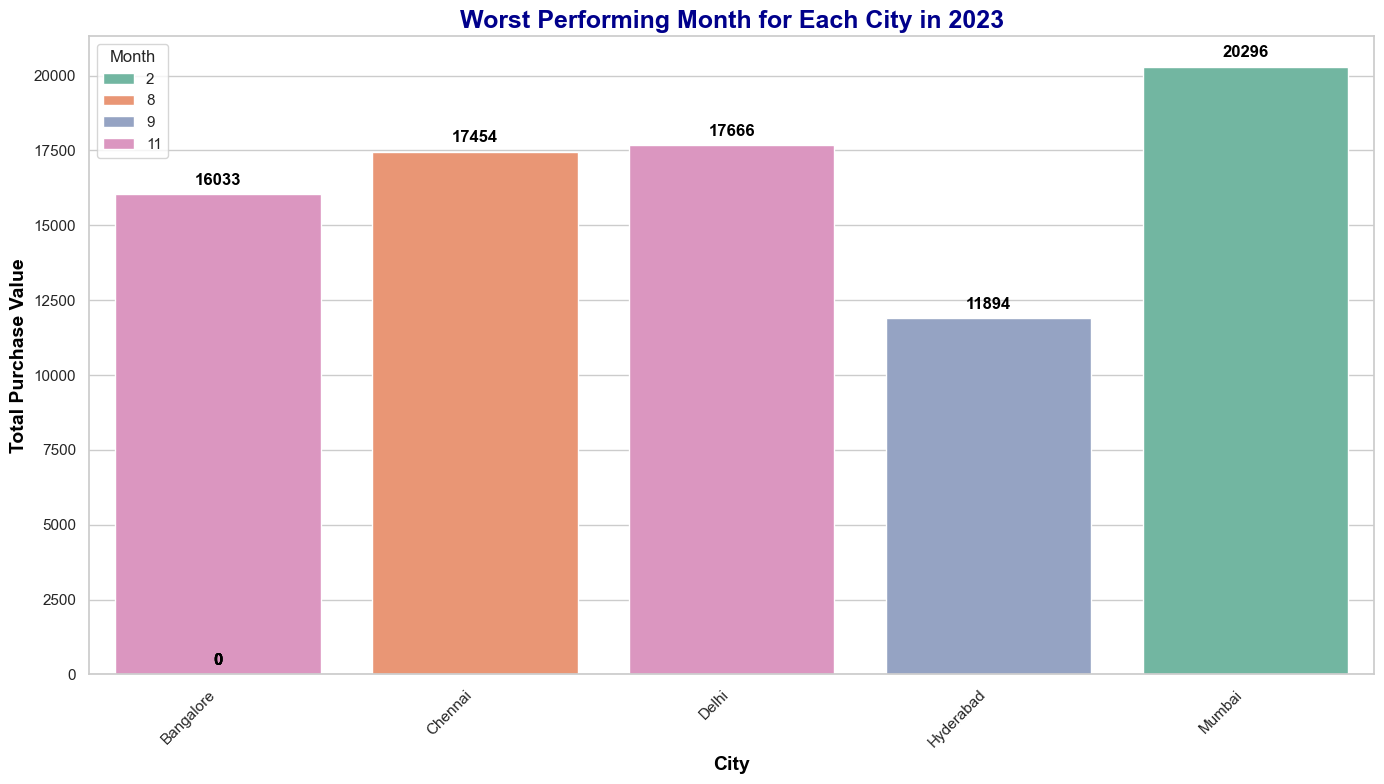

In [112]:

# Find the month where each city is performing worst
worst_months = yearly_city_growth.groupby('City').idxmin()
worst_performance = yearly_city_growth.loc[worst_months.values.flatten()]

# Plot the worst performing month for each city
plt.figure(figsize=(14, 8))

# Use a distinct color palette for visual contrast
sns.set_theme(style="whitegrid", palette="muted")
ax = sns.barplot(data=worst_performance.reset_index(), x='City', y=2023, hue='Month', palette='Set2')

# Adding the title with a modern and bold style
plt.title('Worst Performing Month for Each City in 2023', fontsize=18, fontweight="bold", color="darkblue")

# Customizing axis labels
plt.xlabel('City', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Total Purchase Value', fontsize=14, fontweight='bold', color='black')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add annotations to show exact values on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', fontweight='bold', 
                xytext=(0, 10), textcoords='offset points')

# Show the plot
plt.tight_layout()  # To ensure everything fits well
plt.show()

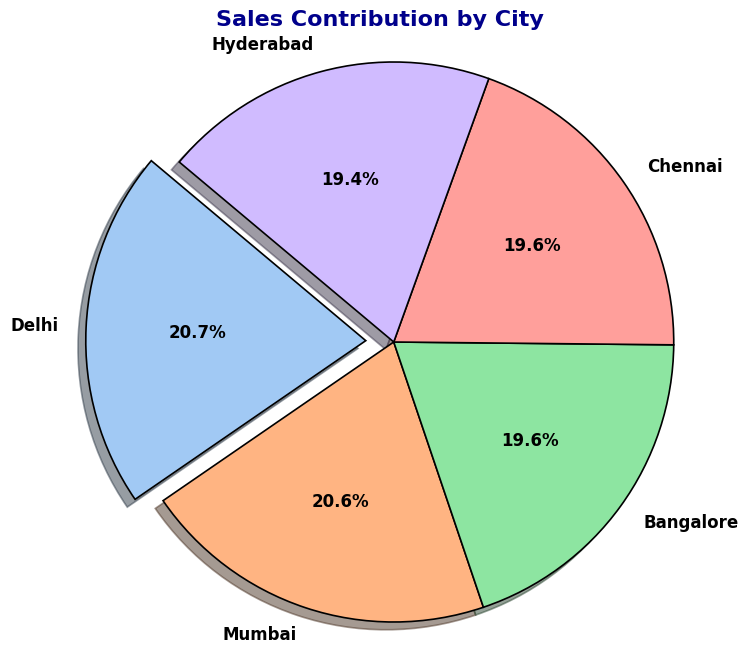

In [99]:

city_sales = df["City"].value_counts()

# Define color palette
colors = sns.color_palette("pastel", len(city_sales))

# Highlight the largest segment
explode = [0.1 if i == 0 else 0 for i in range(len(city_sales))]

# Plot pie chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    city_sales, labels=city_sales.index, autopct="%1.1f%%",
    startangle=140, colors=colors, explode=explode, shadow=True,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.2}
)

# Style text
for text in texts + autotexts:
    text.set_fontsize(12)
    text.set_color("black")
    text.set_fontweight("bold")

# Title with modern styling
plt.title("Sales Contribution by City", fontsize=16, fontweight="bold", color="darkblue")

# Display pie chart
plt.axis("equal")  # Ensures it's a perfect circle
plt.show()

In [1]:
"""

from kafka import KafkaConsumer
import json
import sqlite3

# Connect to SQLite database (or any other database)
conn = sqlite3.connect('inventory.db')
cursor = conn.cursor()

# Create inventory table if it doesn't exist
cursor.execute('''
CREATE TABLE IF NOT EXISTS inventory (
    product_id INTEGER PRIMARY KEY,
    product_name TEXT,
    stock_level INTEGER,
    optimal_stock_level INTEGER DEFAULT 50  -- Default optimal stock level
)
''')
conn.commit()

# Function to update inventory levels
def update_inventory(product_id, quantity_sold):
    cursor.execute('SELECT stock_level, optimal_stock_level FROM inventory WHERE product_id = ?', (product_id,))
    result = cursor.fetchone()
    
    if result:
        stock_level, optimal_stock_level = result
        new_stock_level = stock_level - quantity_sold
        cursor.execute('UPDATE inventory SET stock_level = ? WHERE product_id = ?', (new_stock_level, product_id))
        conn.commit()
        print(f'Updated stock level for product {product_id}: {new_stock_level}')
        
        if new_stock_level < 10:  # Threshold for replenishment
            trigger_replenishment(product_id, new_stock_level, optimal_stock_level)
    else:
        print(f'Product {product_id} not found in inventory')

# Function to trigger replenishment
def trigger_replenishment(product_id, current_stock_level, optimal_stock_level):
    required_stock = optimal_stock_level - current_stock_level
    if required_stock > 0:
        print(f'Triggering replenishment for product {product_id}. Need to order {required_stock} more units.')
        # Add logic to place replenishment order (e.g., API call, email, etc.)
    else:
        print(f'Product {product_id} is already at optimal stock level or overstocked.')

# Set up Kafka consumer
consumer = KafkaConsumer(
    'sales_topic',
    bootstrap_servers=['localhost:9092'],
    value_deserializer=lambda m: json.loads(m.decode('utf-8'))
)

# Process messages from Kafka
for message in consumer:
    sales_data = message.value
    product_id = sales_data['product_id']
    quantity_sold = sales_data['quantity_sold']
    update_inventory(product_id, quantity_sold)
"""


"\n\nfrom kafka import KafkaConsumer\nimport json\nimport sqlite3\n\n# Connect to SQLite database (or any other database)\nconn = sqlite3.connect('inventory.db')\ncursor = conn.cursor()\n\n# Create inventory table if it doesn't exist\ncursor.execute('''\nCREATE TABLE IF NOT EXISTS inventory (\n    product_id INTEGER PRIMARY KEY,\n    product_name TEXT,\n    stock_level INTEGER,\n    optimal_stock_level INTEGER DEFAULT 50  -- Default optimal stock level\n)\n''')\nconn.commit()\n\n# Function to update inventory levels\ndef update_inventory(product_id, quantity_sold):\n    cursor.execute('SELECT stock_level, optimal_stock_level FROM inventory WHERE product_id = ?', (product_id,))\n    result = cursor.fetchone()\n    \n    if result:\n        stock_level, optimal_stock_level = result\n        new_stock_level = stock_level - quantity_sold\n        cursor.execute('UPDATE inventory SET stock_level = ? WHERE product_id = ?', (new_stock_level, product_id))\n        conn.commit()\n        print(